<a href="https://colab.research.google.com/github/hemanthpoojar21-maker/Life-expectancy-project/blob/main/lifeexpectancy_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Life Expectancy Data.csv")

df.head()


Saving Life Expectancy Data.csv to Life Expectancy Data (1).csv


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

df = df.drop_duplicates()

num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

print("\nAfter Cleaning:\n", df.isnull().sum().sum(), " missing values remaining.")


Dataset Shape: (2938, 22)

Missing Values:
 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

After Cleaning:
 0  missing values remaining.


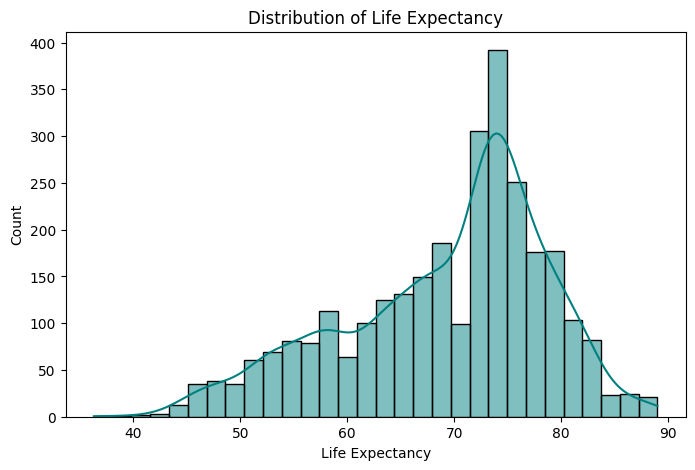

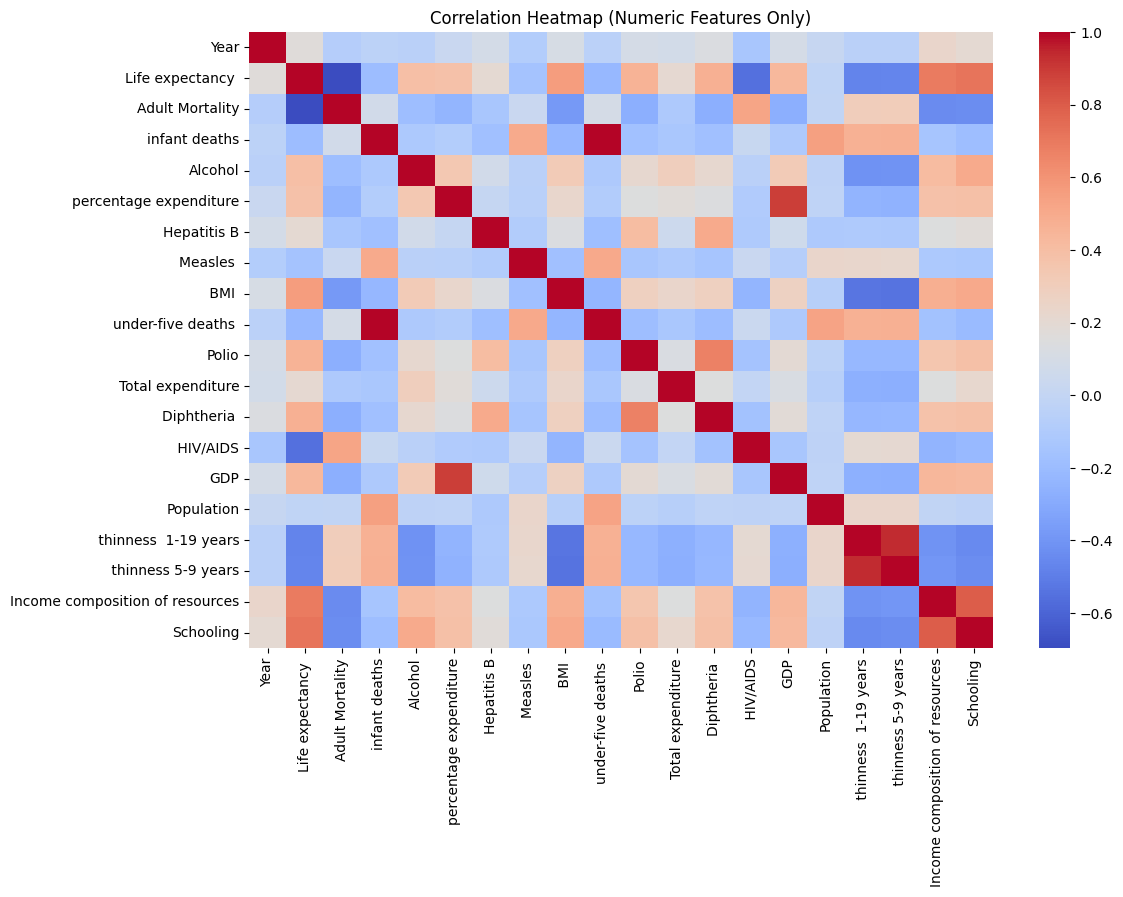

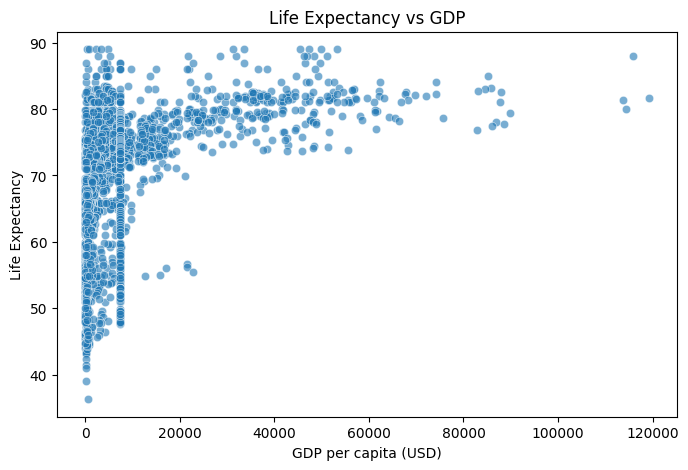

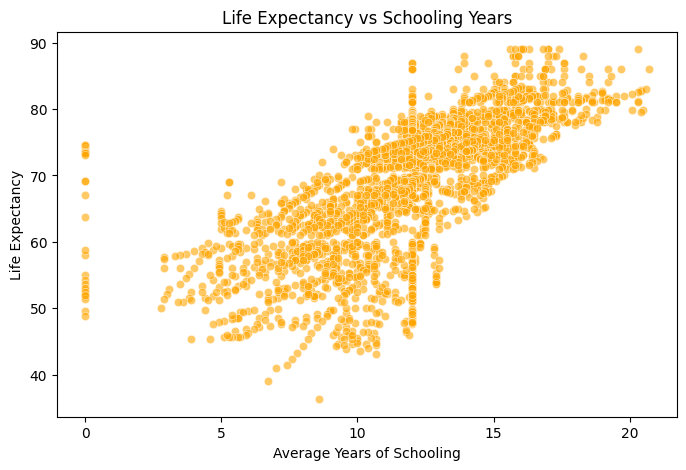

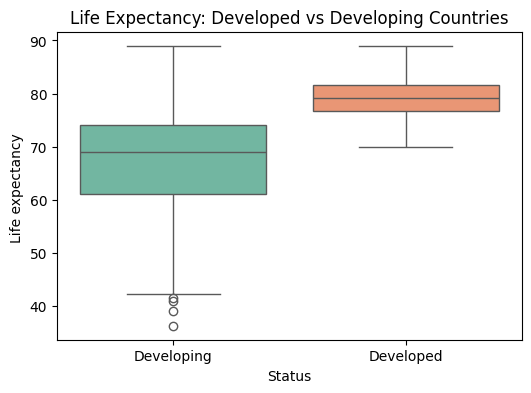

In [ ]:
# Distribution of Life Expectancy
plt.figure(figsize=(8,5))
sns.histplot(df['Life expectancy '], kde=True, color='teal', bins=30)
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Count")
plt.show()

# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


# GDP vs Life Expectancy
plt.figure(figsize=(8,5))
sns.scatterplot(x='GDP', y='Life expectancy ', data=df, alpha=0.6)
plt.title("Life Expectancy vs GDP")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life Expectancy")
plt.show()

# Schooling vs Life Expectancy
plt.figure(figsize=(8,5))
sns.scatterplot(x='Schooling', y='Life expectancy ', data=df, color='orange', alpha=0.6)
plt.title("Life Expectancy vs Schooling Years")
plt.xlabel("Average Years of Schooling")
plt.ylabel("Life Expectancy")
plt.show()

# Status (Developed vs Developing)
plt.figure(figsize=(6,4))
sns.boxplot(x='Status', y='Life expectancy ', data=df, palette='Set2')
plt.title("Life Expectancy: Developed vs Developing Countries")
plt.show()


In [ ]:
# Pearson Correlation between GDP and Life Expectancy
gdp_corr, p_val = stats.pearsonr(df['GDP'], df['Life expectancy '])
print(f"Correlation between GDP and Life Expectancy: {gdp_corr:.3f} (p-value={p_val:.3e})")

# Pearson Correlation between Schooling and Life Expectancy
school_corr, p_val2 = stats.pearsonr(df['Schooling'], df['Life expectancy '])
print(f"Correlation between Schooling and Life Expectancy: {school_corr:.3f} (p-value={p_val2:.3e})")

# Developed vs Developing Countries
developed = df[df['Status'] == 'Developed']['Life expectancy ']
developing = df[df['Status'] == 'Developing']['Life expectancy ']

t_stat, p_value = stats.ttest_ind(developed, developing)
print("\nT-Test: Developed vs Developing")
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3e}")

if p_value < 0.05:
    print(" Statistically significant difference found in Life Expectancy.")
else:
    print(" No significant difference found.")


Correlation between GDP and Life Expectancy: 0.430 (p-value=7.229e-133)
Correlation between Schooling and Life Expectancy: 0.715 (p-value=0.000e+00)

T-Test: Developed vs Developing
T-statistic: 29.805, p-value: 9.035e-171
 Statistically significant difference found in Life Expectancy.


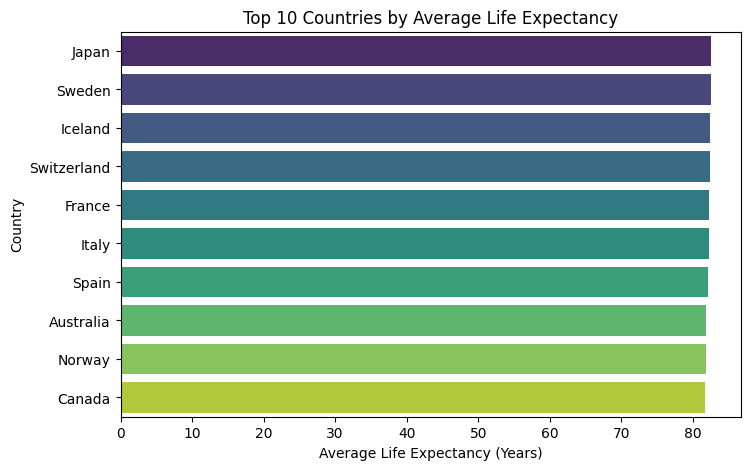

In [ ]:
# life expectancy by top countries
top_countries = df.groupby('Country')['Life expectancy '].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Average Life Expectancy")
plt.xlabel("Average Life Expectancy (Years)")
plt.show()


##  Life Expectancy Project – Conclusion

The life expectancy analysis revealed that economic stability, education levels, and healthcare
access play a major role in determining a country’s average lifespan. Variables such as
**GDP per capita**, **schooling**, and **immunization rates** showed strong positive relationships
with life expectancy, while **adult mortality** had an inverse effect.

Predictive modeling confirmed that these socio-economic and health-related factors are reliable
indicators for estimating life expectancy.

**In conclusion,** the study highlights that continued investment in education, healthcare
infrastructure, and economic growth can significantly improve the overall quality of life and
increase life expectancy across populations.
